In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'Facebook_Marketplace_data.csv')
dk = df.copy()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

#Count of different types of posts in the dataset

In [3]:
unique_counts=df.nunique()
print(unique_counts)

status_id           7050
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64


In [4]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
#there are no missing values in all columns

Missing values in each column:
 status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


#Average value of reactions, comments, shares for each post type

In [5]:
avg_values = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

print(avg_values)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


#Correlation between the number of reactions and comments and shares

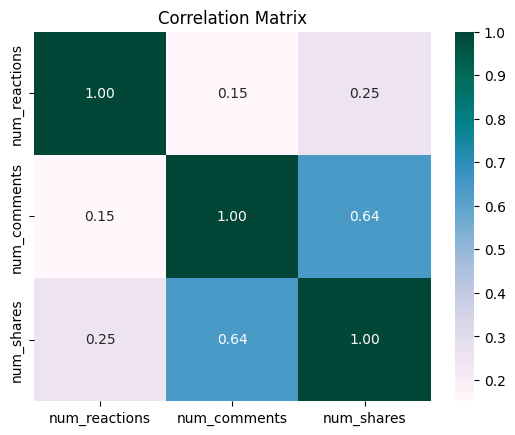

In [6]:
rad = dk[['num_reactions', 'num_comments', 'num_shares']]
radio_cor=rad.select_dtypes(include=['int64','float64'])
corr_matrix_rad=radio_cor.corr()
sns.heatmap(corr_matrix_rad,annot=True,cmap='PuBuGn',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#How does the time of upload (`status_published`)  affects the `num_reaction`?


In [19]:
# print(df.columns)
spl = df[['status_published']]
spl['date'] = spl['status_published'].str.split(' ').str[0]
spl['time'] = spl['status_published'].str.split(' ').str[1]
spl.drop('status_published', axis=1, inplace=True)
spl = pd.concat([ spl, df[['num_reactions']]], axis=1)

spl['hour'] = pd.to_datetime(spl['time']).dt.hour
avg_reactions_per_hour = spl.groupby('hour')['num_reactions'].mean()
meadian_reactions_per_hour = spl.groupby('hour')['num_reactions'].median()
sum_reactions_per_hour = spl.groupby('hour')['num_reactions'].sum()

# data = np.array([avg_reactions_per_hour, meadian_reactions_per_hour, sum_reactions_per_hour])
# print(data)

print('avg_reactions_per_hour',avg_reactions_per_hour)
print('meadian_reactions_per_hour',meadian_reactions_per_hour)
print('sum_reactions_per_hour',sum_reactions_per_hour)


spl['month'] = pd.to_datetime(spl['date']).dt.month
avg_reactions_per_month = spl.groupby('month')['num_reactions'].mean()
meadian_reactions_per_month = spl.groupby('month')['num_reactions'].median()
sum_reactions_per_month = spl.groupby('month')['num_reactions'].sum()

# data_month = np.array([avg_reactions_per_month, meadian_reactions_per_month, sum_reactions_per_month])
# print(data_month)

print('avg_reactions_per_month',avg_reactions_per_month)
print('meadian_reactions_per_month',meadian_reactions_per_month)
print('sum_reactions_per_month',sum_reactions_per_month)


<ipython-input-19-78387b0d3578>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl['date'] = spl['status_published'].str.split(' ').str[0]
<ipython-input-19-78387b0d3578>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl['time'] = spl['status_published'].str.split(' ').str[1]
<ipython-input-19-78387b0d3578>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

avg_reactions_per_hour hour
0     261.839474
1     203.315725
2     163.907618
3     290.270208
4     242.685864
5     293.870968
6     340.213198
7     183.301549
8     204.796897
9     205.780761
10    234.508333
11    180.639456
12    196.053763
13    176.875000
14    261.333333
15    341.666667
16    283.250000
17    384.000000
18    351.750000
19    442.368421
20    417.288136
21    261.907895
22    238.376126
23    244.276850
Name: num_reactions, dtype: float64
meadian_reactions_per_hour hour
0      79.5
1      86.0
2      29.0
3      51.0
4      49.0
5      68.5
6     126.5
7      48.0
8      36.0
9      64.0
10     84.0
11     67.0
12     87.0
13     54.5
14     88.0
15     47.0
16    296.5
17     43.0
18    363.5
19     87.0
20    114.0
21    102.0
22     43.0
23     75.0
Name: num_reactions, dtype: float64
sum_reactions_per_hour hour
0      99499
1     165499
2     101131
3     125687
4      92706
5     109320
6     134044
7     153790
8     145201
9      91984
10     56282
1

In [8]:
# df.drop(['status_id'],axis=1,inplace=True)
df.drop(['Column1'],axis=1,inplace=True)
df.drop(['Column2'],axis=1,inplace=True)
df.drop(['Column3'],axis=1,inplace=True)
df.drop(['Column4'],axis=1,inplace=True)
# df.drop(['num_reactions'],axis=1,inplace=True)
print(df.columns)

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')


In [9]:
X=df.iloc[:,:]
# print(X)
X['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Assuming 'status_type' is at index 2 after dropping columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['status_type'])], remainder='passthrough')
X = np.array(ct.fit_transform(df))
print(X)


[[0.0 0.0 0.0 ... 1 1 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 1 0 0]
 ...
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]]


In [11]:
new_column_names = ct.get_feature_names_out()
print(new_column_names)

['encoder__status_type_link' 'encoder__status_type_photo'
 'encoder__status_type_status' 'encoder__status_type_video'
 'remainder__status_id' 'remainder__status_published'
 'remainder__num_reactions' 'remainder__num_comments'
 'remainder__num_shares' 'remainder__num_likes' 'remainder__num_loves'
 'remainder__num_wows' 'remainder__num_hahas' 'remainder__num_sads'
 'remainder__num_angrys']


#Elbow method to find the optimum number of clusters

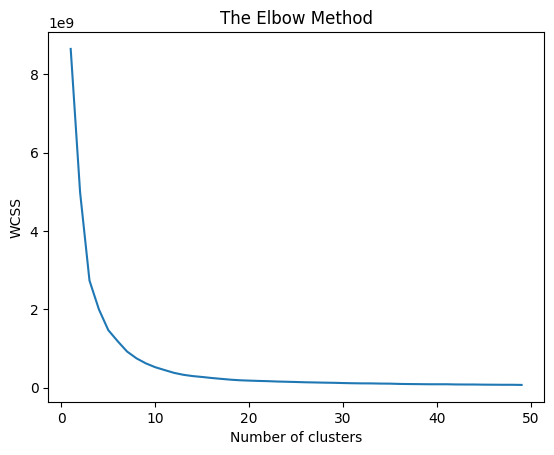

In [12]:
xx = X[:, 0:4]
xx = np.concatenate((xx, X[:,6:]), axis=1)
# print(xx[0])
# print(xx[1])
wcss = []
for i in range(1, 50):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init=10)
  kmeans.fit(xx)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


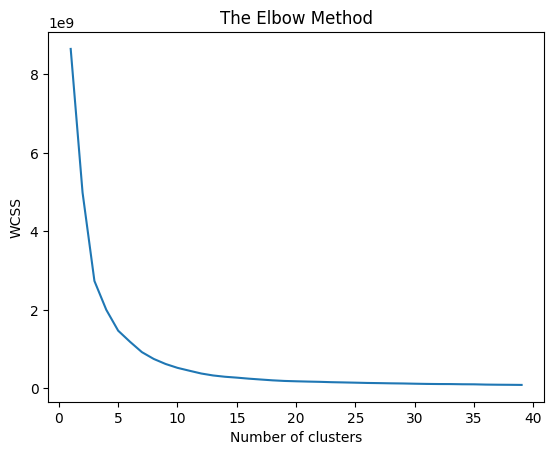

In [13]:
wcss1 = []
for i in range(1, 40):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init=10)
  kmeans.fit(xx)
  wcss1.append(kmeans.inertia_)

plt.plot(range(1, 40), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class

# kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42,n_init=10)
# y_kmeans = kmeans.fit_predict(xx)
# #from graph "10" will be the optimum no.of clusters

x_c = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
scaler = StandardScaler() # Now you can use StandardScaler
X_scaled = scaler.fit_transform(x_c)

# Train K-Means clustering model
kmeans = KMeans(n_clusters=10, init='k-means++',random_state=42)
kmeans.fit(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

#K-Means clustering

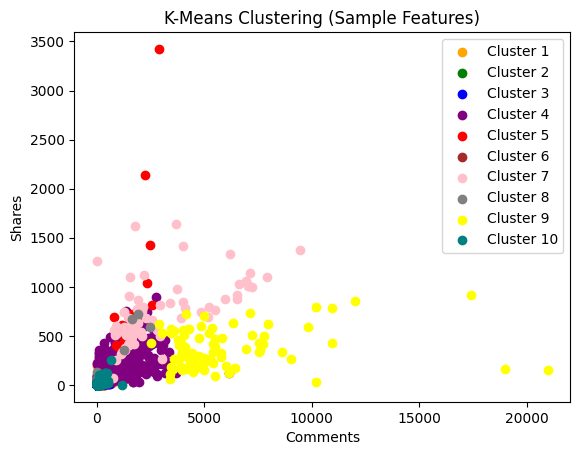

In [15]:

labels = kmeans.labels_

colors = ['orange', 'green', 'blue', 'purple', 'red', 'brown', 'pink', 'gray', 'yellow', 'teal']  # Colors for 10 clusters

for i in range(10):
  # Filter data for cluster i
  cluster_data = x_c.iloc[kmeans.labels_ == i]

  # Check if any data points belong to cluster i (avoid empty plots)
  if cluster_data.shape[0] > 0:
    plt.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], c=colors[i], label=f'Cluster {i+1}')

# Add labels and title
plt.xlabel('Comments')
plt.ylabel('Shares')
plt.title('K-Means Clustering (Sample Features)')

# Add legend
plt.legend()

# Show the plot
plt.show()





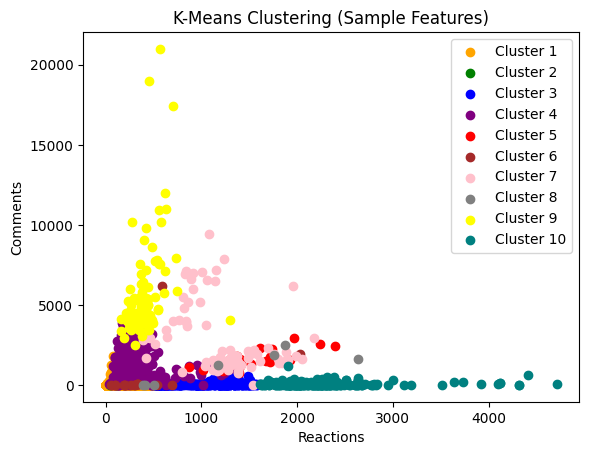

In [16]:
colors = ['orange', 'green', 'blue', 'purple', 'red', 'brown', 'pink', 'gray', 'yellow', 'teal']  # Colors for 10 clusters

for i in range(10):
  # Filter data for cluster i
  cluster_data = x_c.iloc[kmeans.labels_ == i]

  # Check if any data points belong to cluster i (avoid empty plots)
  if cluster_data.shape[0] > 0:
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], c=colors[i], label=f'Cluster {i+1}')

# Add labels and title
plt.xlabel('Reactions')
plt.ylabel('Comments')
plt.title('K-Means Clustering (Sample Features)')

# Add legend
plt.legend()

# Show the plot
plt.show()

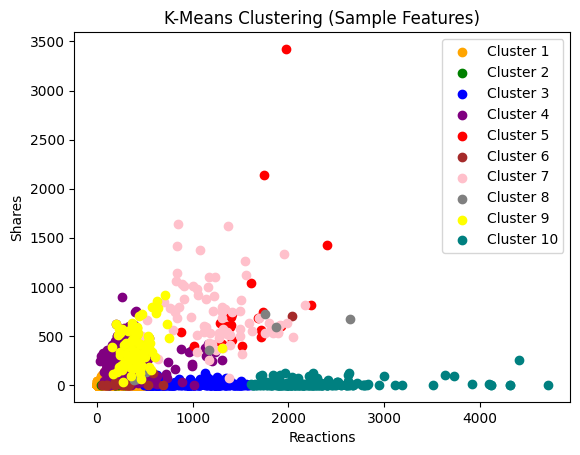

In [17]:
colors = ['orange', 'green', 'blue', 'purple', 'red', 'brown', 'pink', 'gray', 'yellow', 'teal']  # Colors for 10 clusters

for i in range(10):
  # Filter data for cluster i
  cluster_data = x_c.iloc[kmeans.labels_ == i]

  # Check if any data points belong to cluster i (avoid empty plots)
  if cluster_data.shape[0] > 0:
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 2], c=colors[i], label=f'Cluster {i+1}')

# Add labels and title
plt.xlabel('Reactions')
plt.ylabel('Shares')
plt.title('K-Means Clustering (Sample Features)')

# Add legend
plt.legend()

# Show the plot
plt.show()